In [1]:
import pickle
import pyulog
import pandas as pd
import os
import h5py
import numpy as np
h5py.enable_ipython_completer()

In [2]:
log = pyulog.ULog('22_35_07.ulg')

In [3]:
x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)], dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])
x[0]['weight']

81.0

In [43]:
if 'store' in locals():
    store.close()
store = pd.HDFStore('test.hdf5', 'w')

topics = {}
for topic in log.data_list:
    if topic.name not in topics.keys():
        topics[topic.name] = {}
    topic_data = {}
    for k in topic.data.keys():
        if k != 'timestamp':
            topic_data[k] = topic.data[k]
    topic_index = pd.UInt64Index(topic.data['timestamp'], name='timestamp, us')
    topics[topic.name][topic.multi_id] = pd.DataFrame(data=topic_data, index=topic_index)

messages = []
for message in log.logged_messages:
    messages.append([message.timestamp, message.log_level, message.log_level_str(), message.message])
msgs = pd.DataFrame(messages, columns=['timestamp', 'log_level', 'log_level_str', 'message']).set_index('timestamp')
store.put('messages', msgs)

for topic_name in topics.keys():
    topic = topics[topic_name]
    for multi_id in topic.keys():
        store.put('/topics/{:s}/id{:d}'.format(topic_name, multi_id), topic[multi_id])

store['initial_parameters'] = pd.DataFrame(log.initial_parameters, index=[0])
store['changed_parameters'] = pd.DataFrame(log.initial_parameters, index=[0])

#store['topics'] = topics
#store['messages'] = messages
#store['initial_parameters'] = log.initial_parameters
#store['changed_parameters'] = log.changed_parameters

#with open('test.pkl', 'wb') as f:
#    f.write(pickle.dumps(data))
#store.close()

In [90]:
print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: test.hdf5
/changed_parameters                              frame        (shape->[1,539])  
/initial_parameters                              frame        (shape->[1,539])  
/messages                                        frame        (shape->[1,3])    
/topics/actuator_controls_0/id0                  frame        (shape->[804,9])  
/topics/actuator_outputs/id0                     frame        (shape->[804,17]) 
/topics/actuator_outputs/id1                     frame        (shape->[804,17]) 
/topics/battery_status/id0                       frame        (shape->[163,20]) 
/topics/cpuload/id0                              frame        (shape->[82,2])   
/topics/distance_sensor/id0                      frame        (shape->[792,7])  
/topics/estimator_status/id0                     frame        (shape->[403,71]) 
/topics/input_rc/id0                             frame        (shape->[403,27]) 
/topics/manual_control_setpoint/id0              f

In [101]:
import dataclasses
from typing import NamedTuple

In [103]:
class Vector(NamedTuple):
    x: float
    y: float
    z: float

In [104]:
@dataclass
class Mag:
    timestamp: int
        

SyntaxError: unexpected EOF while parsing (<ipython-input-104-ec1974c68b42>, line 3)

In [96]:
np.array(1.23, dtype=bool)

array(True)

In [100]:
@dataclass
class Mag:
    timestamp: np.uint64
    magnetometer_ga: np.array

In [97]:
@dataclass
class Msg:
    timestamp: np.uint64

@dataclass
class Mag(Msg):
    timestamp: np.uint64
    magnetometer_ga: bool

In [98]:
np.array(1, dtype=([]
    (np.int)
))

TypeError: 'list' object is not callable

In [58]:
from dataclasses import dataclass

@dataclass
class InventoryItem:
    name: str
    unit_price: float
    quantity_on_hand: int = 0

    def total_cost(self) -> float:
        return self.unit_price * self.quantity_on_hand

item = InventoryItem('hammers', 10.49, 12)
print(item.total_cost())

125.88


In [ ]:
InventoryItem()

In [45]:
%matplotlib inline
store.get('/topics/vehicle_magnetometer/id0')['magnetometer_ga[0]']

timestamp, us
185796503   -0.114525
185818440   -0.116992
185841440   -0.109592
185863440   -0.116992
185885440   -0.115758
185908440   -0.115758
185930440   -0.104660
185952446   -0.104660
185974440   -0.112059
185996440   -0.102193
186018440   -0.114525
186040479   -0.110826
186061649   -0.115758
186084440   -0.105893
186105440   -0.115758
186128451   -0.110826
186150583   -0.109592
186172440   -0.114525
186193440   -0.110826
186216440   -0.114525
186237440   -0.110826
186260440   -0.110826
186282440   -0.110826
186304443   -0.113292
186326440   -0.116992
186348458   -0.100960
186370700   -0.110826
186392474   -0.110826
186414480   -0.119458
186436475   -0.112059
               ...   
266743686   -0.067664
266767444   -0.072597
266789440   -0.079996
266812619   -0.078763
266834453   -0.081229
266856642   -0.082462
266878440   -0.084929
266901824   -0.075063
266924695   -0.072597
266946475   -0.072597
266968751   -0.066431
266991445   -0.078763
267014452   -0.078763
267036831   -0.084

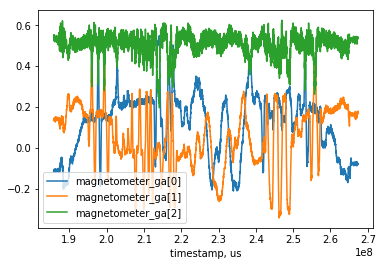

In [53]:
store.get('/topics/vehicle_magnetometer/id0').plot()

In [14]:
import numpy as np
np.array(messages[0])

array(['4418456', '52', 'WARNING', '[cei] update rate slow:      4.41081'],
      dtype='<U36')

In [68]:
print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: test.hdf5
/messages                                        frame        (shape->[1,3])                                           
/topics/actuator_controls_0/id0                  frame_table  (typ->appendable,nrows->804,ncols->8,indexers->[index])  
/topics/actuator_outputs/id0                     frame_table  (typ->appendable,nrows->804,ncols->17,indexers->[index]) 
/topics/actuator_outputs/id1                     frame_table  (typ->appendable,nrows->804,ncols->17,indexers->[index]) 
/topics/battery_status/id0                       frame_table  (typ->appendable,nrows->163,ncols->20,indexers->[index]) 
/topics/cpuload/id0                              frame_table  (typ->appendable,nrows->82,ncols->2,indexers->[index])   
/topics/distance_sensor/id0                      frame_table  (typ->appendable,nrows->792,ncols->7,indexers->[index])  
/topics/estimator_status/id0                     frame_table  (typ->appendable,nrows->403,ncols->71,i

In [69]:
store['/topics/vehicle_status/id0'].head()

,onboard_control_sensors_present,onboard_control_sensors_enabled,onboard_control_sensors_health,nav_state,arming_state,hil_state,failsafe,system_type,system_id,component_id,...,vtol_fw_permanent_stab,in_transition_mode,in_transition_to_fw,rc_signal_lost,rc_input_mode,data_link_lost,high_latency_data_link_active,data_link_lost_counter,engine_failure,mission_failure
t,,,,,,,,,,,,,,,,,,,,,
185.370214,64,64,64,0,2,0,0,2,1,1,...,0,0,0,0,0,1,0,1,0,0
186.379933,64,64,64,0,2,0,0,2,1,1,...,0,0,0,0,0,1,0,1,0,0
187.384549,64,64,64,0,2,0,0,2,1,1,...,0,0,0,0,0,1,0,1,0,0
188.389150,64,64,64,0,2,0,0,2,1,1,...,0,0,0,0,0,1,0,1,0,0
189.391152,64,64,64,0,2,0,0,2,1,1,...,0,0,0,0,0,1,0,1,0,0


In [298]:
def sort_data(data):
    #sort all of data for replay
    next_index = []
    for topic_name in data['topics'].keys():
        for multi_id in data['topics'][topic_name].keys():
            for i, t in enumerate(data['topics'][topic_name][multi_id].index):
                next_index.append((t, i, topic_name, multi_id))
    next_index = sorted(next_index, key=lambda x: x[0])
    return next_index

In [299]:
!du -hs test.pkl

du: cannot access 'test.pkl': No such file or directory


In [300]:
!du -hs 22_35_07.ulg

2.2M	22_35_07.ulg


In [289]:
with open('test.pkl', 'rb') as f:
    data2 = pickle.loads(f.read())

FileNotFoundError: [Errno 2] No such file or directory: 'test.pkl'

In [302]:
%matplotlib inline
data2['topics']['vehicle_magnetometer'][0].plot()

NameError: name 'data2' is not defined

In [9]:
%time
next_index = sort_data(data2);

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 5.96 µs


In [21]:
#for topic in data2['topics'].keys():
#    print(data2['topics'][topic][0].dtypes)

In [30]:
mag = data['topics']['vehicle_magnetometer'][0]
mag.dtypes

magnetometer_ga[0]    float32
magnetometer_ga[1]    float32
magnetometer_ga[2]    float32
dtype: object

In [50]:
next_index[-10:]

[(267.381733, 20330, 'sensor_combined', 0),
 (267.38248799999997, 5556, 'vehicle_air_data', 0),
 (267.385768, 20331, 'sensor_combined', 0),
 (267.386887, 2590, 'vehicle_attitude', 0),
 (267.389727, 20332, 'sensor_combined', 0),
 (267.389834, 2590, 'vehicle_rates_setpoint', 0),
 (267.38989, 2590, 'rate_ctrl_status', 0),
 (267.39044, 3679, 'vehicle_magnetometer', 0),
 (267.393765, 20333, 'sensor_combined', 0),
 (267.394574, 3692, 'safety', 0)]

In [53]:
log.data_list[0].data

{'timestamp': array([185796503, 185818440, 185841440, ..., 267342450, 267364449,
        267390440], dtype=uint64),
 'magnetometer_ga[0]': array([-0.11452515, -0.11699153, -0.10959242, ..., -0.079996  ,
        -0.07629645, -0.07752963], dtype=float32),
 'magnetometer_ga[1]': array([0.13816044, 0.13926683, 0.13484126, ..., 0.17245857, 0.17909692,
        0.17909692], dtype=float32),
 'magnetometer_ga[2]': array([0.5484296 , 0.54707825, 0.53356427, ..., 0.53761846, 0.54167265,
        0.5389699 ], dtype=float32)}

In [20]:
t_data = []
for t, i, topic, multi_id in next_index:
    if topic == 'vehicle_magnetometer' and multi_id == 0:
        pass
    elif topic == 'sensor_combined' and multi_id == 0:
        pass
    t_data.append(data['topics'][topic][multi_id].index[i])

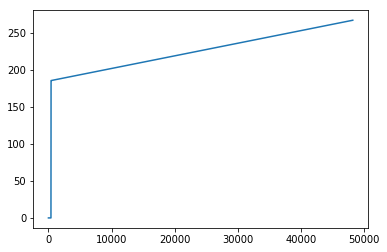

In [21]:
import matplotlib.pyplot as plt
plt.plot(t_data)

In [32]:
import numpy as np

In [38]:
mag.dtypes

magnetometer_ga[0]    float32
magnetometer_ga[1]    float32
magnetometer_ga[2]    float32
dtype: object

In [40]:
mag

,magnetometer_ga[0],magnetometer_ga[1],magnetometer_ga[2]
"t, sec",,,
185.796503,-0.114525,0.138160,0.548430
185.818440,-0.116992,0.139267,0.547078
185.841440,-0.109592,0.134841,0.533564
185.863440,-0.116992,0.144799,0.552484
185.885440,-0.115758,0.138160,0.526807
185.908440,-0.115758,0.141480,0.522753
185.930440,-0.104660,0.132628,0.533564
185.952446,-0.104660,0.142586,0.547078
185.974440,-0.112059,0.145905,0.552484
